In [1]:
import pandas as pd 
import numpy as np 
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
%matplotlib inline

loan_data = pd.read_csv('XAI_dataset-master/Ch1.loan/loanData.csv')

/Users/isubin/miniconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
loan_data.tail()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
609,LA001350,Male,22,Yes,NaN,Graduate,No,43,13650,56,0.0,1.0,759,Urban,1,2,4000,26,1
610,LA001357,Male,24,NaN,NaN,Graduate,No,62,3816,41,754.0,1.0,3190,Urban,1,2,2880,30,1
611,LA001760,Male,25,NaN,NaN,Graduate,No,86,4758,52,0.0,1.0,1747,Semiurban,1,2,2844,34,1
612,LA002943,Male,67,No,NaN,Graduate,No,12,2987,2,0.0,0.0,0,Semiurban,1,2,1760,30,0
613,LA002393,Female,44,NaN,NaN,Graduate,No,94,10047,43,0.0,1.0,1181,Semiurban,2,1,3712,22,1


In [3]:
loan_data['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [4]:
loan_data['married'].unique()

array(['Yes', 'No', nan], dtype=object)

In [5]:
loan_data['dependents'].unique()

array(['3+', '2', '1', '0', nan], dtype=object)

In [6]:
loan_data['education'].unique()

array(['Not Graduate', 'Graduate'], dtype=object)

In [7]:
loan_data['self_employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [8]:
loan_data['business_type'].unique()

array([88, 14, 56, 46, 60, 80, 21, 66, 30, 64, 42, 94,  4, 45, 26, 76, 74,
       35, 43, 59, 11, 29, 61, 78, 51, 81, 58, 10, 37, 16, 49, 55, 96, 36,
       83, 68, 70, 63, 13, 65, 86, 85, 40, 73, 41, 31, 24, 93, 27, 15, 97,
       82, 47,  3, 87, 53, 91, 48, 71, 84, 89, 33, 67, 57, 52, 90,  5,  1,
        2, 28, 77, 79, 92, 72, 99, 17, 44, 69, 95, 38, 20, 54, 34,  9,  8,
       50, 18,  6, 19, 62, 23, 32, 75, 98, 12, 22, 25,  7])

In [9]:
loan_data['credit_history'].unique()

array([ 0., nan,  1.])

In [10]:
loan_data['property_area'].unique()

array(['Semiurban', 'Rural', 'Urban'], dtype=object)

## preprocessing

In [11]:
gender_mapping = {'Male':1, 'Female':0, np.nan:-1}
married_mapping = {'No':0, 'Yes':1, np.nan:-1}
dep_mapping = {'0':0, '1':1, '2':2, '3+':3, np.nan:-1}
edu_mapping = {'Graduate':1, 'Not Graduate':0}
emp_mapping = {'No':0, 'Yes':1, np.nan:-1}
prop_mapping = {'Urban':1, 'Rural':3, 'Semiurban':2}


loan_data = loan_data.replace({'gender':gender_mapping,
                               'married':married_mapping,
                               'dependents':dep_mapping,
                               'education':edu_mapping,
                               'self_employed':emp_mapping,
                               'property_area':prop_mapping})

loan_data.head()

,id,gender,age,married,dependents,education,self_employed,business_type,applicant_income,applicant_work_period,coapplicant_income,credit_history,credit_amount,property_area,property_type,credit_rate,loan_amount,loan_term,loan_status
0,LA001250,1.0,55,1.0,3.0,0,0.0,88,4755,51,0.0,0.0,0,2,3,8,2090,0,0
1,LA001864,1.0,68,1.0,3.0,0,0.0,14,4931,47,0.0,NaN,0,2,3,7,5376,24,0
2,LA002536,1.0,43,1.0,3.0,0,0.0,56,3095,33,0.0,1.0,1382,3,3,5,3390,33,1
3,LA001264,1.0,22,1.0,3.0,0,1.0,46,3333,68,2166.0,NaN,0,2,2,5,2600,36,1
4,LA001384,1.0,34,1.0,3.0,0,0.0,60,2071,60,754.0,1.0,2756,2,2,5,2820,53,0


## train_test_split

In [12]:
from sklearn.model_selection import train_test_split 


# id 제외
X = loan_data.loc[:,'gender':'loan_term']
y = loan_data.loc[:,'loan_status']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [13]:
x_train.shape, y_train.shape

((491, 17), (491,))

## train model

In [14]:
model = XGBClassifier(booster ='gbtree',
                      objective = 'binary:logistic')
model.fit(x_train, y_train)

[23:39:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/isubin/miniconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/isubin/miniconda3/lib/python3.9/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
from sklearn.metrics import accuracy_score 

def calculate_accuracy(model, x_test, y_test):
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%'%(accuracy*100.0))
    
    return accuracy

In [16]:
calculate_accuracy(model, x_test, y_test)

Accuracy: 82.93%


0.8292682926829268

# XAI

### feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

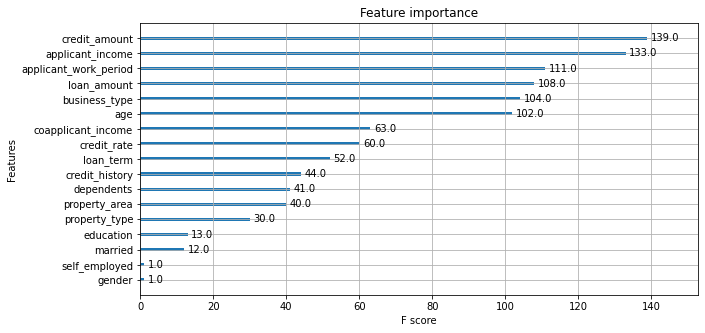

In [17]:
import xgboost 
from matplotlib.pylab import rcParams 

rcParams['figure.figsize'] = 10,5
xgboost.plot_importance(model)

- feature importance에 의하면 credit_amount(대출중인 금액), applicant_income(대출 신청인 수입), applicant_work_period(대출 신청인 근무기간), loan_amount(대출 금액), business_type(국세청 기준 대출 신청인 업종 코드), age(대출 신청인의 나이) 순으로 중요하다. 
- married(기혼 유무)와 self_employed(자영업 유무), gender(성별)은 상대적으로 대출 결정 여부에 큰 영향을 미치지 않는 것으로 보인다.

### SHAP

In [18]:
import shap

# 13번째 사용자 데이터 출력
idx = 13
print(x_train.iloc[idx,:])

# JS시각화 라이브러리 로드하기
shap.initjs()

# SHAP값으로 모델의 예측 결과 설명하기 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

# 설명체의 해석 결과 출력하기
shap.force_plot(explainer.expected_value,
               shap_values[idx,:],
               x_train.iloc[idx,:])

gender                      1.0
age                        30.0
married                     1.0
dependents                  0.0
education                   1.0
self_employed               0.0
business_type              74.0
applicant_income         1809.0
applicant_work_period      35.0
coapplicant_income       1868.0
credit_history              1.0
credit_amount            3212.0
property_area               1.0
property_type               1.0
credit_rate                 3.0
loan_amount              2520.0
loan_term                  30.0
Name: 498, dtype: float64


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


13번째 사용자의 섀플리 요인 분석 결과  
- 대출 신청이 승인됐다(5.83>0)  
- 나이(30살), 사용자의 신용 등급(3등급)과 대출 신청인 근무 기간(35)인 항목들이 대출 승인에 크게 긍정적으로 작용했음
- 비중은 작지만 대출 신청 금액(2,520), 기존 대출 여부가 1건, 배우자 수입(1,868), 업종분류(74:사업 시설 관리 및 조경 서비스업)가 도움이 됐음
- 반면 대출 신청자 연봉(1,809)이 대출 심사에 악영향을 미침

In [19]:
idx = 15

shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

shap.force_plot(explainer.expected_value,
               shap_values[idx,:],
               x_train.iloc[idx,:])

15번째 사용자의 섀플리 요인 분석 결과   
- 대출 신청이 거절됐다(-6.33<0)
- 거절된 이유는 현재 대출 내역이 없는 것, 낮은 신용 등급(7등급), 높은 나이(60)가 주를 이룬다
- 비중은 작지만 대출 신청자의 업종이 14로 의복 제조업에 종사한다는 이유도 함께 확인가능 
- 반면 배우자 수입(7,250)이 긍정적인인 요소지만 머신러닝 모델은 대출 신청인이 직접 상환할 수 있는 능력을 더 비중 있게 판단하는 것처럼 보임

In [20]:
# 전체 출력
shap.initjs()

shap.force_plot(explainer.expected_value, shap_values, x_train)

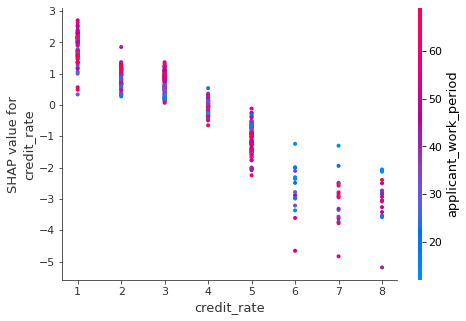

In [21]:
# 신용등급 하나의 피처에 대해 SHAP 영향력을 출력
shap.dependence_plot('credit_rate', shap_values, x_train)

- 대출 여부가 신용 등급과 느슨한 선형 관계를 갖는다는 것을 보여줌
- 예외가 있기는 하지만, 일반적으로 대출은 5등급보다 높을 때 긍정적인 영향을 미치고, 그 아래 등급에서는 부정적인 영향을 미침

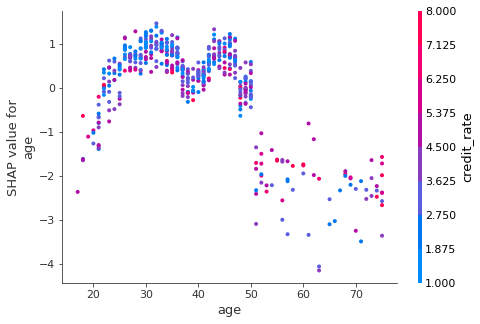

In [22]:
shap.dependence_plot('age', shap_values, x_train)

- 나이가 20대 초반이라면 대출에 부정적인 영향을, 20대 중반부터 50대까지는 대출 승인에 긍정적인 영향을 미침
- 50대 이상이 되면 나이가 대출에 부정적인 영향을 미침

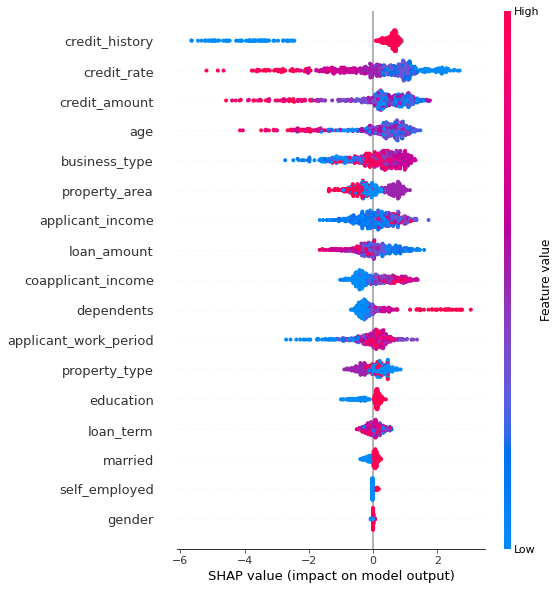

In [23]:
# 모든 피처에 대해 모델에 미치는 영향력 출력
shap.summary_plot(shap_values, x_train)

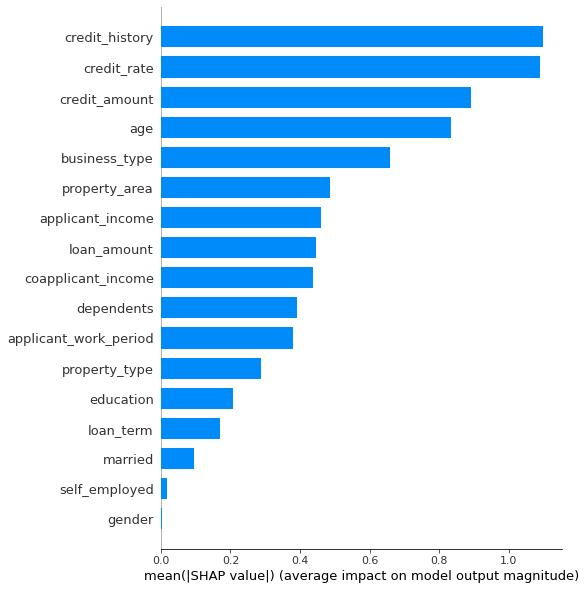

In [24]:
shap.summary_plot(shap_values, x_train, plot_type='bar')

## 모델 개선

In [25]:
# feature importace, shap결과 중요하지 않은 변수 제거

X.drop(['gender', 'self_employed', 'married'], axis=1, inplace=True)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model = XGBClassifier(booster='gbtree',
                      objective='binary:logistic')

model.fit(x_train,y_train)
calculate_accuracy(model, x_test, y_test)

[23:39:45] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 83.74%


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


0.8373983739837398